<a href="https://colab.research.google.com/github/ashym26/project101/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import matplotlib.pylab as plt
from sklearn import model_selection,metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df_f=pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df_f.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#To remove the blank "TotalCharges " that happen when customers have 0 months tenure so will change those to $0.
df_f[df_f['TotalCharges'].isna()==True]= 0
df_f['OnlineBackup'].unique()

array([1, 0])

In [ ]:
#changing data type of non-numeric data to int
df_f['gender'].replace(['Male','Female'],[0,1],inplace=True)
df_f['Partner'].replace(['Yes','No'],[1,0],inplace=True)
df_f['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
df_f['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
df_f['MultipleLines'].replace(['Yes','No','No phone service'],[1,0,0],inplace=True)
df_f['InternetService'].replace(['No','DSL','Fibre optic'],[0,1,2],inplace=True)
df_f['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df_f['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df_f['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df_f['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df_f['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df_f['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df_f['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True)
df_f['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
df_f['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer(automatic)','Credit card(automatic)'],[0,1,2,3],inplace=True)
df_f['Churn'].replace(['No','Yes'],[0,1],inplace=True)
df_f.info()


TypeError: ignored

<function matplotlib.pyplot.show>

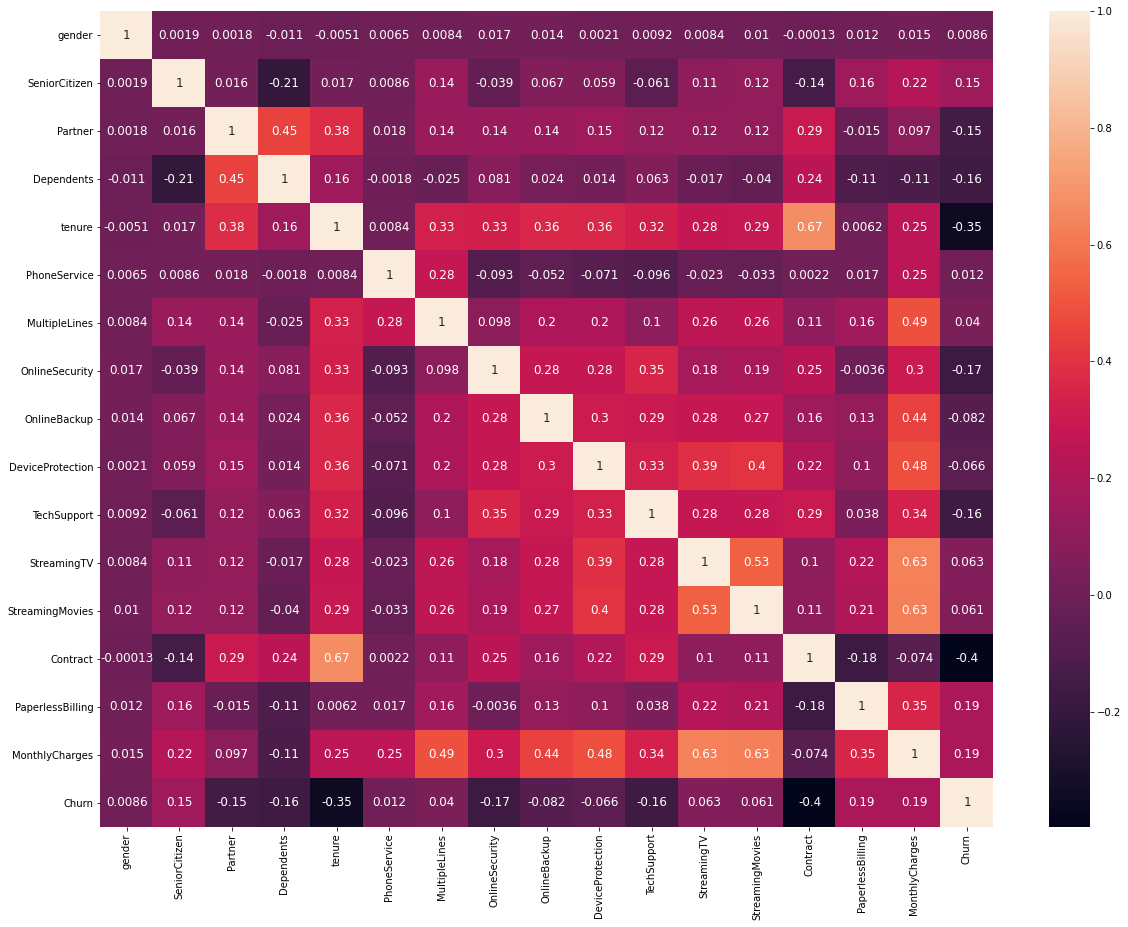

In [ ]:
corr=df_f.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show

In [ ]:
df_f.pop('TotalCharges')

KeyError: ignored

In [ ]:
#to check if totalcharges has been removed/popped off
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


<function matplotlib.pyplot.show>

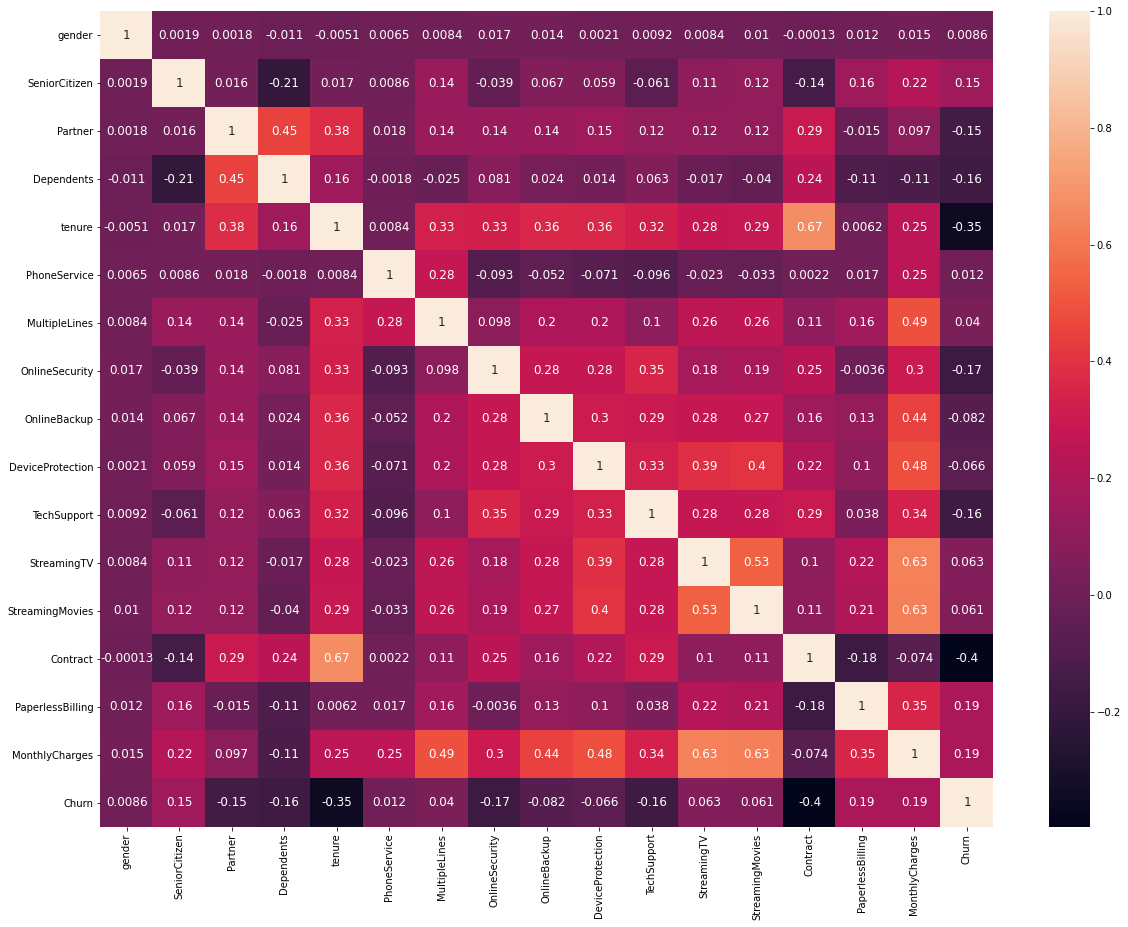

In [ ]:
#to do correlation without the totalcharges 
corr=df_f.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show

In [ ]:
#to find how many churn data points we have
print(len(df_f['Churn']))

7043


In [ ]:
#to find how many customers in this dataset are churned.if 50% of customers is churned or not?
df_f['Churn'].value_counts()
# we see that its actually 26.54

0    5174
1    1869
Name: Churn, dtype: int64

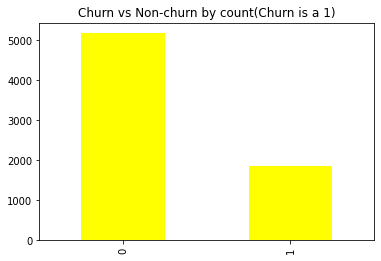

In [ ]:
# to create a Bargraph for churn vs non-churn
df_f['Churn'].value_counts().plot(kind='bar',title='Churn vs Non-churn by count(Churn is a 1)',color='yellow',align='center')
plt.show()

In [ ]:
#creates initial contingency table between churn & gender.Male is 0 and Female is 1
gender_churn_contigency=pd.crosstab(df_f["gender"],df_f["Churn"])
display(gender_churn_contigency)

Churn,0,1
gender,,
0,2625,930
1,2549,939


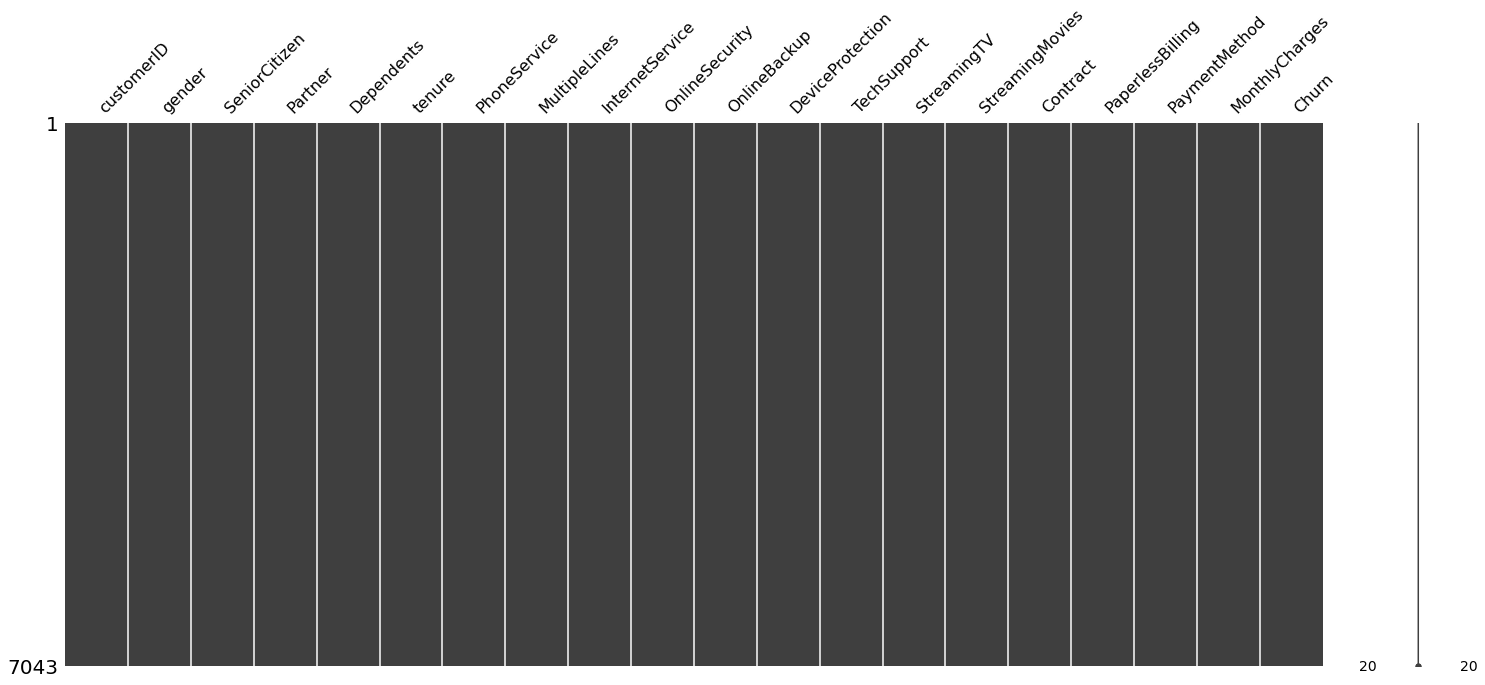

In [ ]:
#check data health. all sections should be black indicating data is complete
ms.matrix(df_f)

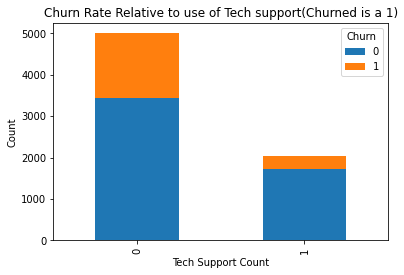

In [ ]:
#explore the relationship of instances of Tech Support and Churn
#stacked Bar of Tecch support and Churn
tech_support_churn=pd.crosstab(df_f['TechSupport'],df_f['Churn'])
tech_support_churn.plot(kind='bar',stacked=True)
plt.ylabel('Count')
plt.xlabel('Tech Support Count')
plt.title('Churn Rate Relative to use of Tech support(Churned is a 1)')
plt.show()

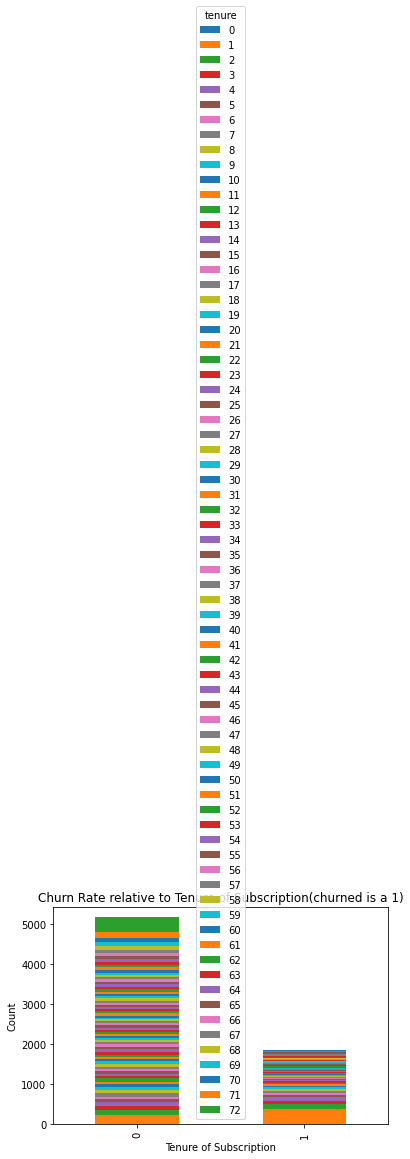

In [ ]:
#churn rate relative to tenure
churn_tenure=pd.crosstab(df_f['Churn'],df_f['tenure'])
churn_tenure.plot(kind='bar',stacked=True)
plt.ylabel('Count')
plt.xlabel('Tenure of Subscription')
plt.title('Churn Rate relative to Tenure of Subscription(churned is a 1)')
plt.show()

In [ ]:
#distribution of features
features=['gender','SeniorCitizen','Partner','Dependents','PhoneService','tenure','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','TechSupport','PaperlessBilling','MonthlyCharges','PaymentMethod']
df_f[features].describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,TechSupport,PaperlessBilling,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,0.903166,32.371149,0.421837,0.286668,0.344881,0.343888,0.384353,0.387903,0.290217,0.592219,64.761692
std,0.500013,0.368612,0.499748,0.458110,0.295752,24.559481,0.493888,0.452237,0.475363,0.475038,0.486477,0.487307,0.453895,0.491457,30.090047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000


In [ ]:
#plot distribution of observations for tenure
sns.distplot(df_f['tenure'])

In [ ]:
#how customer pays have to do with churn
_,axes=plt.subplots(1,2,sharey=True,figsize=(10,4))
sns.countplot(x='PaperlessBilling',hue='Churn',df_f=df_f, ax=axes[0])
sns.countplot(x='PaymentMethod',hue='Churn',df_f=df_f,ax=axes[1])



In [ ]:
#to see if other products from the Co have to do with churning
_,axes=plt.subplots(1,2,sharey=True,figsize=(10,4))
sns.countplot(x='PhoneService',hue='Churn',df_f=df_f,ax=axes[0])
sns.countplot(x='InternetService',hue='Churn',df_f=df_f,ax=axes[1])


In [ ]:
#splitting the data for training and testing
x_train,x_test,y_train,y_test=train_test_split(df_f.drop('Churn',axis=1),
                                               df_f['Churn'],test_size=0.30,
                                               random_state=101)


In [ ]:
train=pd.concat([x_train,y_train],axes=1)

In [ ]:
#function to estimate the best value of n_estimators and fit the model with given data
def modelfit(alg, dtrain,predictors, useTrainCV=True, cvfolds=5, eraly_stopping_rounds=50):
    if useTrainCV:
      xgb_param=alg.get_xgb_params()
      xgtrain=xgb.Dmatrix(dtrain[predictors].values, label=dtrain[target].values)
      cvresult=xgb.cv(xgb.param, xgtrain,
                      num_boost_round=alg.get_params()['n estimators'], nfold=cv_folds,
                      metrics='auc', early_stopping_rounds=early_stopping_rounds)
      alg.set_params(n_estimators=cvresult.shape[0])
      print(alg.get_xgb_params())
      alg.fit(dtrain[predictors],dtrain['Churn'],eval_metric='auc')

      return alg

In [ ]:
#function to get accuracy of the model on the test data given
def get_accuracy(alg,predictors):
    dtrain_predictions=alg.predict(X_test[predictors])
    dtrain_predprob=alg.predict_proba(X_test[predictors])[:1]
    print('\Model report')
    print("Accuracy:%.4g"% metrics.accuracy_score(y_test.values,
                                                  dtrain_predictions))
    print("AUC Score(Train):%f"%metric.roc_auc_score(y_test.values,
                                                     dtrain_predprob))
  

In [ ]:
#function to get feature importance based on the model fit
def get_feature_importances(alg):
    feat_imp=pd.Series(alg._Booster.get_fscore()).sort_values(ascending=False)
    print(feat_imp)

   feat_imp.plot(kind='bar', title='Feature Importance')
   plt.ylabel('Feature Importance Score')
        

In [ ]:
target='Churn'
IDcol='CustomerID'